<a href="https://colab.research.google.com/github/LeeSeungwon89/Machine-learning_Theory/blob/master/CHAPTER3%20%EB%B9%84%EC%A7%80%EB%8F%84%20%ED%95%99%EC%8A%B5%EA%B3%BC%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3.1 비지도 학습의 종류

- '비지도 학습(unsupervised learning)'이란 알고 있는 출력값이나 정보 없이 학습 알고리즘을 가르쳐야 하는 모든 종류의 머신러닝을 의미합니다. 입력 데이터만으로 데이터에서 지식을 추출해야 합니다.

 - '비지도 변환(unsupervised transformation)'은 데이터를 새롭게 표현하여 사람이나 다른 머신러닝 알고리즘이 원래 데이터보다 쉽게 해석할 수 있도록 만드는 알고리즘입니다. 가장 널리 사용되는 분야는 특성이 많은 고차원 데이터의 특성 수를 줄이면서 꼭 필요한 특징을 포함한 데이터로 표현하는 '차원 축소(dimensionality reduction)'이며, 대표적인 예는 시각화를 위해 데이터셋을 2차원으로 변경하는 것입니다.   

   데이터를 구성하는 단위나 성분을 찾기도 합니다. 많은 텍스트 문서에서 주제를 추출하는데, 이때 처리할 작업은 문서에서 다루는 주제가 무엇인지 찾고 학습하는 것입니다. 소셜 미디어에서 여러 특정 주제로 이뤄지는 토론을 찾아내는 수단으로 사용될 수 있습니다.

 - '군집(clustering)'은 데이터를 비슷한 것끼리 묶는 것입니다. 사진에 있는 얼굴들을 추출해서 비슷한 얼굴로 그룹화하고, 같은 사람의 얼굴이라면 이미지들을 그룹으로 묶습니다.

# 3.2 비지도 학습의 도전 과제

비지도 학습에서 가장 어려운 일은 알고리즘이 어떤 유용한 것을 학습했는지 평가하는 것입니다. 이 학습 방식에서는 보통 레이블이 없는 데이터에 적용하기 때문에 무엇이 올바른 출력인지 알 수 없으므로 어떤 모델이 유용한지 설명하기가 난해합니다. 예를 들면 가상의 군집 알고리즘이 사람 얼굴을 분류하는 방법으로서 옆모습 사진과 앞모습 사진으로 그룹을 나눌 수 있지만 정작 이는 우리가 원하는 방법은 아닙니다. 비지도 학습의 결과를 평가하려면 결국 직접 확인하는 것이 유일한 방법일 경우가 많습니다.

따라서 비지도 학습 알고리즘은 데이터를 더 잘 파악하고 싶을 때 탐색적분석 단계에서 많이 사용하거나, 지도 학습의 전처리 단계에서도 사용합니다. 비지도 학습의 결과로 새롭게 표현된 데이터를 사용해서 학습하면 지도 학습의 정확도가 좋아지기도 하고 자원(시간, 메모리 등)을 절약할 수도 있습니다.

# 3.3 데이터 전처리와 스케일 조정

지도 학습 알고리즘에서 전처리와 스케일 조정을 자주 사용하지만, 기실 스케일 조정 메서드는 '지도 정보(supervised information)'를 사용하지 않으므로 비지도 방식이라고 할 수 있습니다.

신경망과 SVM 같은 알고리즘은 데이터의 스케일에 매우 민감하므로 특성마다 스케일을 조정해서 데이터를 변경해야 합니다.

In [96]:
pip install mglearn

In [97]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
%matplotlib inline

특성 두 개를 인위적으로 만든 이진 분류 데이터셋을 사용해서 그래프를 그립니다.

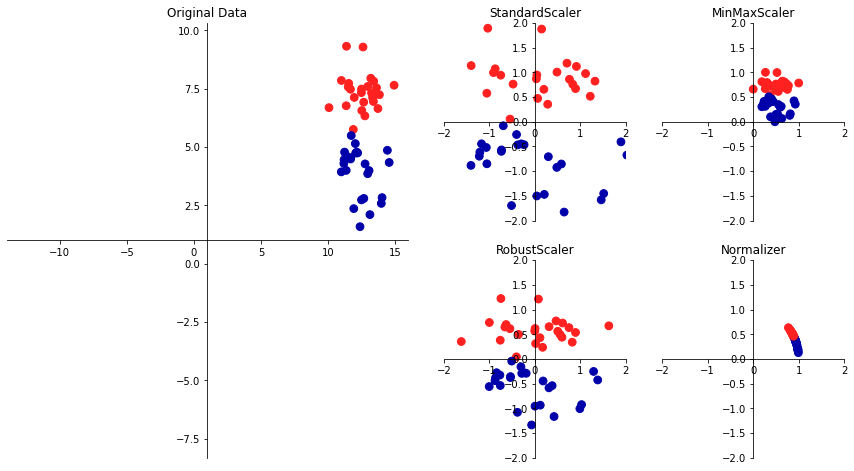

In [98]:
mglearn.plots.plot_scaling()

## 3.3.1 여러 가지 전처리 방법

위 그래프에 대해 간략하게 설명합니다. 먼저 첫 번째 그래프의 경우 첫 번째 특성(x축의 값)은 10과 15 사이에 있고, 두 번째 특성(y축의 값)은 1과 9 사이에 있습니다. 이 그래프를 토대로 오른쪽에 위치한 그래프 네 개로 전처리를 한 것입니다.

- `StandardScaler`: 각 특성의 평균을 0, 분산을 1로 변경하여 모든 특성이 같은 크기를 갖게 됩니다. 다만 이 방법은 특성의 최솟값과 최댓값 크기를 제한하지는 않습니다. 공식은 $\frac{x-\overline{x}}{\sigma}$이며 $\overline{x}$는 평균, $\sigma$는 표준편차입니다. 이 값을 표준 점수(표준값, z-점수)라고 합니다.

- `RobustScaler`: 특성들이 같은 스케일을 갖게 된다는 통계적 측면에서는 `StandardScaler`와 비슷하지만, 평균과 분산 대신 중간 값(median)과 사분위 값(quartile)을 사용합니다. 중간 값은 $x$보다 작은 수가 절반이고 $x$보다 큰 수가 절반인 $x$입니다. 1사분위 값은 $x$보다 작은 수가 전체 개수의 1/4인 $x$이고, 3사분위는 $x$보다 큰 수가 전체 개수의 1/4인 $x$를 의미합니다. 공식은 $\frac{x-q_2}{q_3-q_1}$이며, $q_2$는 중간 값, $q_1$은 1사분위 값, $q_3$은 3사분위 값입니다.   
이런 방식 때문에 전체 데이터와 멀리 떨어진 샘플(e.g.측정 에러)에 영향을 받지 않습니다. 이런 이상 데이터를 '이상치(outlier)'라고 하며, 다른 스케일 조정 기법에서는 문제가 될 수 있습니다.

- `MinMaxScaler`: 모든 특성이 정확하게 0과 1 사이에 위치하도록 데이터를 바꿉니다. $\frac{x-x_{min}}{x_{max}-x_{min}}$이며, 데이터에서 최솟값을 빼고 전체 범위로 나눕니다. 2차원 데이터셋일 경우에는 모든 데이터가 x축의 0과 1, y축의 0과 1 사이의 사각 영역에 담깁니다.

- `Normalizer`: 특성 벡터의 유클리디안 길이가 1이 되도록 샘플을 조정합니다. 매개변수 `norm`은 `l1`, `l2`, `max` 값을 제공하고, 기본값은 유클리디안 거리를 의미하는 `l2`입니다. 위 세 가지 전처리 방법은 각 특성(열)의 통계치를 사용하지만, `Normalizer`는 샘플(행)마다 정규화됩니다.   
여하튼 지름이 1인 원(3차원일 경우에는 구)에 샘플을 투영합니다. 다시 말하면 각 샘플이 다른 비율로 길이에 반비례하여 스케일이 조정되는 것을 의미합니다. 이런 정규화(normalization)는 특성 벡터의 길이와는 무관하며 데이터의 방향이나 각도만이 중요할 때 많이 사용합니다.

## 3.3.2 데이터 변환 적용하기

일반적으로 지도 학습 알고리즘을 적용하기 전에 스케일을 조정하는 전처리 메서드를 사용합니다. 먼저 데이터를 적재하고 훈련 세트와 테스트 세트로 나눕니다(전처리 후에 생성된 지도 학습 모델을 평가하기 위해 훈련 세트와 테스트 세트로 나눠야 합니다).

cancer 데이터셋을 사용하여 데이터를 변환합니다. 커널 SVM(`SVC`)을 적용하고 전처리에 `MinMaxScaler`를 사용할 예정입니다. 먼저 데이터를 훈련 세트와 데이터 세트로 나누고 데이터셋의 형태를 살핍니다.

In [99]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=1)

print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


샘플 569개와 특성 30개로 구성된 데이터셋입니다. 샘플 426개를 훈련 세트, 143개를 테스트 세트로 나눕니다.

전처리가 구현된 '파이썬 클래스'를 임포트 하고 객체를 생성합니다(지금까지 책과 정리본에서 사용해 온 클래스라는 용어는 분류형 문제에서 출력값과 범주형 특성을 의미했으므로, 프로그램 언어의 클래스를 의미할 땐 '파이썬 클래스'로 지칭할 예정이나, 의미를 혼동하지 않을 만한 위치에 해당 내용을 서술한다면 단순하게 클래스라고 지칭할 예정입니다).

In [100]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

`fit` 메서드에 훈련 데이터를 적용합니다. `MinMaxScaler`의 `fit` 메서드는 훈련 세트에 있는 특성마다 최솟값과 최댓값을 계산합니다. 분류 모델과 회귀 모델과 달리 스케일 객체는 `fit` 메서드를 호출할 때 'X_train'만 넘겨주고 'y_train'은 사용하지 않습니다.

In [101]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

`fit` 메서드로 학습한 변환을 적용하려면(훈련 데이터의 스케일을 조정하려면) 스케일 객체의 `transform` 메서드를 사용합니다. `transform` 메서드는 새로운 데이터 표현(representation)을 만들 때 사용합니다.

In [102]:
# 훈련 데이터를 변환합니다.
X_train_scaled = scaler.transform(X_train)
# 스케일이 조정된 데이터셋의 속성을 출력합니다.
print('변환된 후 크기:', X_train_scaled.shape)
print('스케일 조정 전 특성별 최솟값:\n', X_train.min(axis=0))
print('스케일 조정 전 특성별 최댓값:\n', X_train.max(axis=0))
print('스케일 조정 후 특성별 최솟값:\n', X_train_scaled.min(axis=0))
print('스케일 조정 후 특성별 최댓값:\n', X_train_scaled.max(axis=0))

변환된 후 크기: (426, 30)
스케일 조정 전 특성별 최솟값:
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
스케일 조정 전 특성별 최댓값:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
스케일 조정 후 특성별 최솟값:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
스케일 조정 후 특성별 최댓값:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


특성 값이 이동되거나 크기가 조정되었을 뿐이므로 변환된 데이터의 배열 크기는 원래 데이터와 동일합니다. 그러나 모든 특성 값은 0과 1 사이로 조정됩니다.

SVM을 적용하려면 테스트 세트도 함께 전처리해야 합니다. 방식은 위와 같습니다.

In [103]:
# 테스트 데이터를 변환합니다.
X_test_scaled = scaler.transform(X_test)
# 스케일이 조정된 데이터셋의 속성을 출력합니다.
print('스케일 조정 후 특성별 최솟값:\n', X_test_scaled.min(axis=0))
print('스케일 조정 후 특성별 최댓값:\n', X_test_scaled.max(axis=0))

스케일 조정 후 특성별 최솟값:
 [ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
스케일 조정 후 특성별 최댓값:
 [0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


0과 1 사이의 값이 아닙니다. 일부는 음수거나 1을 넘습니다. `MinMaxScaler`를 포함한 모든 스케일 모델은 항상 훈련 세트와 테스트 세트에 같은 변환을 적용해야 합니다. `transform` 메서드는 테스트 세트의 최솟값과 범위를 사용하지 않고 항상 훈련 세트의 최솟값을 빼고 훈련 세트의 범위로 나눕니다. 항상 훈련 세트의 통계치를 사용하기 때문에 테스트 세트에 대한 스케일 조정 공식은 $\frac{X_{test}-X_{train_min}}{X_{train_max}-{X_{train_min}}}$이 되며, LaTex 문법의 한계로 인해 명확하게 표현하지 못했습니다. 풀어쓴다면 분모는 X_train_max - X_train_min이고, 분자는 X_test - X_train_min입니다.

## 3.3.3 QuantileTransformer와 PowerTransformer

`QuantitleTransformer`: 분위(quantile) 1,000개를 사용해서 데이터를 균등하게 분포하도록 합니다. `RobustScaler`와 비슷하게 이상치에 민감하지 않고 데이터 전체를 0~1 사이로 압축합니다.

뒤에서 사용했던 데이터셋에 `QuantileTransformer`를 적용합니다. 먼저 예제 데이터를 생성하고 산점도를 그립니다.

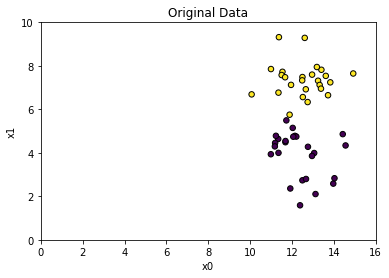

In [104]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import QuantileTransformer, StandardScaler, PowerTransformer

X, y = make_blobs(n_samples=50, centers=2, random_state=4, cluster_std=1)
X += 3

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolors='black')
plt.xlim(0, 16)
plt.ylim(0,10)
plt.xlabel('x0')
plt.ylabel('x1')
plt.title('Original Data')
plt.show()

각 샘플이 흩어진 형태로 분포합니다. `QuantileTransformer`를 적용해서 변화된 스케일을 확인합니다.

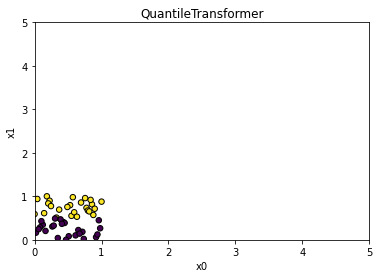

In [105]:
scaler = QuantileTransformer(n_quantiles=50)
X_trans = scaler.fit_transform(X)

plt.scatter(X_trans[:, 0], X_trans[:, 1], c=y, s=30, edgecolors='black')
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.xlabel('x0')
plt.ylabel('x1')
plt.title(type(scaler).__name__)
plt.show()

샘플이 0과 1 사이에 고르게 모였습니다. 히스토그램을 그려서 확인합니다.

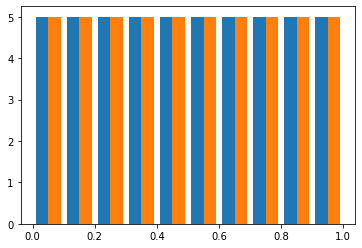

In [106]:
plt.hist(X_trans)
plt.show()

`QuantileTransformer`의 분위 수는 `n_quantiles`(기본값 `1,000`) 매개변수에 설정할 수 있습니다. 'scaler' 객체의 `quantiles_` 속성에 특성별로 계산된 분위 값을 가지므로 이 속성의 크기는 `(n_quantiles, n_features)`입니다.

In [107]:
print(scaler.quantiles_.shape)

(50, 2)


`QuantileTransformer`의 동작을 좀 더 살펴보기 위해 간단한 샘플 데이터를 변환한 결과를 비교합니다. `np.percentile()` 함수는 두 번째 매개변수에서 지정한 분위에 해당하는 샘플을 추출하여 반환합니다.

In [108]:
# 첫 번째, 1사분위, 중간값, 3사분위, 마지막 값을 지정합니다.
x = np.array([[0], [5], [8], [9], [10]])
print(np.percentile(x[:, 0], [0, 25, 50, 75, 100]))

[ 0.  5.  8.  9. 10.]


훈련 샘플이 다섯 개이므로 지정한 분위가 훈련 샘플과 일치합니다.

`QuantileTransformer`로 변환하여 확인합니다.

In [109]:
x_trans = QuantileTransformer(n_quantiles=5).fit_transform(x)
print(x_trans)
print(np.percentile(x_trans[:, 0], [0, 25, 50, 75, 100]))

[[0.  ]
 [0.25]
 [0.5 ]
 [0.75]
 [1.  ]]
[0.   0.25 0.5  0.75 1.  ]


데이터가 분위와 같은 값으로 변환됩니다.

`QuantileTransformer`는 `out_distribution` 매개변수의 값을 `normal`로 지정하여 균등분포를 정규분포로 바꿀 수 있습니다.

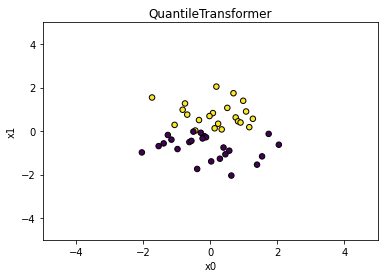

In [110]:
scaler = QuantileTransformer(output_distribution='normal', n_quantiles=50)
X_trans = scaler.fit_transform(X)

plt.scatter(X_trans[:, 0], X_trans[:, 1], c=y, s=30, edgecolors='black')
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.xlabel('x0')
plt.ylabel('x1')
plt.title(type(scaler).__name__)
plt.show()

`PowerTransformer` 클래스는 `method` 매개변수에 `yeo-johnson`(기본값)과 `box-cox` 알고리즘을 지정할 수 있습니다. 

`QuantileTransformer` 클래스와 `StandardScaler`, `PowerTransformer` 클래스가 데이터셋을 정규분포로 변환하는 형태를 히스토그램으로 그립니다.

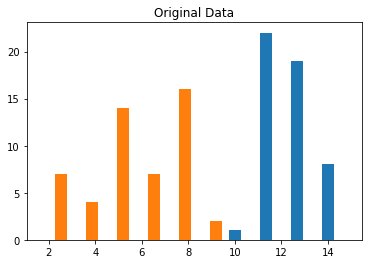

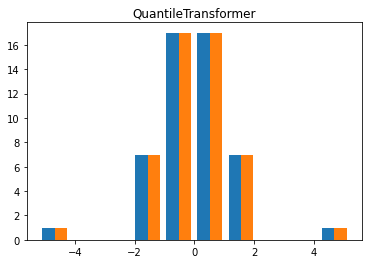

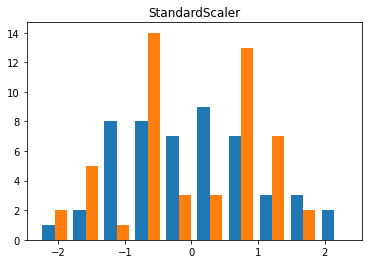

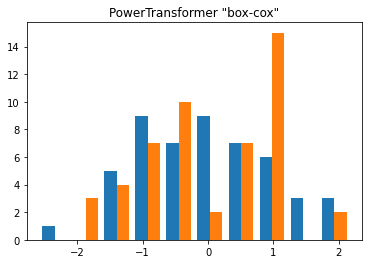

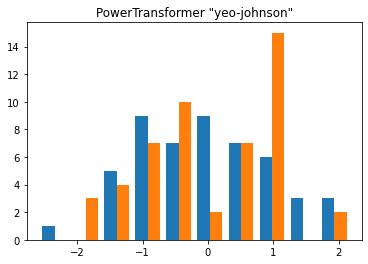

In [111]:
plt.hist(X)
plt.title('Original Data')
plt.show()

X_trans = QuantileTransformer(output_distribution='normal', n_quantiles=50).fit_transform(X)
plt.hist(X_trans)
plt.title('QuantileTransformer')
plt.show()
print()

X_trans = StandardScaler().fit_transform(X)
plt.hist(X_trans)
plt.title('StandardScaler')
plt.show()
print()

X_trans = PowerTransformer(method='box-cox').fit_transform(X)
plt.hist(X_trans)
plt.title('PowerTransformer "box-cox"')
plt.show()
print()

X_trans = PowerTransformer(method='yeo-johnson').fit_transform(X)
plt.hist(X_trans)
plt.title('PowerTransformer "yeo-johnson"')
plt.show()

`PowerTransformer` 클래스에 매개변수를 다르게 지정했지만 같은 결과를 출력했습니다. 실전에서는 데이터셋마다 어떤 변환이 정규분포에 가깝게 변환할지 예측하기 어려우므로 히스토그램을 그려서 확인하는 과정을 밟는 것이 좋습니다.

## 3.3.4 훈련 데이터와 테스트 데이터의 스케일을 같은 방법으로 조정하기

지도 학습 모델에서 테스트 세트를 사용하려면 훈련 세트와 테스트 세트에 같은 변환을 적용해야 합니다. 다음 코드를 통해 이와 반대되는 설명을 제시합니다. 테스트 세트의 최솟값과 범위를 사용할 경우에 나타나는 결과를 나타냅니다.

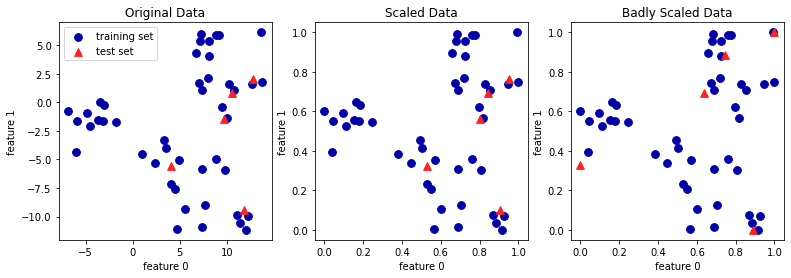

In [112]:
from sklearn.datasets import make_blobs

# 데이터셋을 인위적으로 생성합니다.
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
# 훈련 세트와 테스트 세트를 나눕니다.
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

# 훈련 세트와 테스트 세트의 산점도를 그립니다.
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1], c=mglearn.cm2.colors[0],
                label='training set', s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^', c=mglearn.cm2.colors[1],
                label='test set', s=60)
axes[0].legend(loc='upper left')
axes[0].set_title('Original Data')

# `MInMaxScaler` 클래스를 사용해서 스케일을 조정합니다..
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 스케일이 조정된 데이터의 산점도를 그립니다.
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=mglearn.cm2.colors[0], label='training set', s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^', 
                c=mglearn.cm2.colors[1], label='test set', s=60)
axes[1].set_title('Scaled Data')

# 테스트 세트의 스케일을 따로 조정합니다.
# 테스트 세트의 최솟값은 0, 최댓값은 1이 됩니다.
# 예제를 위해 예시를 든 것이므로 실제로는 이렇게 사용하면 안 됩니다.
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

# 잘못 조정된 데이터의 산점도를 그립니다.
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=mglearn.cm2.colors[0], label='training set', s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1],
                marker='^', c=mglearn.cm2.colors[1], label='test set', s=60)
axes[2].set_title('Badly Scaled Data')

for ax in axes:
    ax.set_xlabel('feature 0')
    ax.set_ylabel('feature 1')

첫 번째 그래프는 2차원 원본 데이터셋입니다. 훈련 세트는 원, 테스트 세트는 삼각형으로 표시했습니다. 

두 번째 그래프는 원본 데이터를 `MinMaxScaler`로 스케일을 조정한 것입니다. 훈련 세트를 사용해서 `fit` 메서드를 호출하고 훈련 세트와 테스트 세트에 `transform` 메서드를 적용했습니다. 축의 눈금이 바뀐 것 말고는 첫 번째 그래프와 같은 형태입니다. 모든 특성이 0과 1 사이에 위치하지만, 테스트 데이터(삼각형)의 최솟값과 최댓값은 0과 1이 아닙니다.

세 번째 그래프는 훈련 세트와 테스트 세트의 스케일을 서로 다른 방식으로 조정했을 경우에 최솟값과 최댓값이 모두 0과 1이 된다는 점을 나타냅니다. 그러나 테스트 샘플은 스케일이 다르게 조정되면서 훈련 세트와 다른 비율로 이동했습니다. 데이터 배열이 엉망입니다.

테스트 세트에 샘플이 하나만 있다면 `MinmaxScaler`에 필요한 최솟값과 최댓값이 없으므로 스케일을 조정할 수 없습니다. 다만 테스트 세트의 크기 때문에 작업 과정이 달라져서도 안 될 노릇입니다.

서적에서는 <단축 메서드와 효율적인 방법> 이라는 제목으로 추가 설명을 덧붙입니다.

보통 어떤 데이터셋에 `fit`을 적용하면 `transform`을 호출합니다. 전형적인 작업 패턴입니다.

더 효율적인 방법이라면 `fit_transform` 메서드를 사용하는 것입니다. 물론 이 메서드가 모든 모델에서 효율이 더 좋은 것은 아니지만 좋은 습관인 것은 확실합니다. 다만 테스트 세트에 `fit_transform()`을 적용하면 훈련 세트에서 학습한 내용이 전부 사라집니다. 테스트 세트에는 반드시 `transform()` 메서드를 사용해야 합니다.

`StandardScaler`를 사용하여 예를 듭니다.

In [113]:
scaler = StandardScaler()
# '메소드 체이닝(chaining)'을 사용하여 `fit`과 `tranform`을 연달아 호출합니다.
X_scaled = scaler.fit(X_train).transform(X_train)
# 연달아 호출하는 것보다 더 나은 방법은 하나의 메서드를 사용하는 것입니다.
X_scaled_d = scaler.fit_transform(X_train)

## 3.3.5 지도 학습에서 데이터 전처리 효과

cancer 데이터셋으로 `SVC`를 학습시킬 때 `MinMaxScaler`의 효과를 확인합니다. 2장에서 한 스케일 조정과 같지만 방법이 다릅니다. 비교를 위해 원본 데이터로  `SVC` 모델을 만듭니다.

In [114]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=0)

svm = SVC(gamma='auto')
svm.fit(X_train, y_train)
print('테스트 세트 정확도: {:.2f}'.format(svm.score(X_test, y_test)))

테스트 세트 정확도: 0.63


`SVC` 모델을 학습시키기 전에 `MinMaxScaler` 클래스를 사용해서 데이터의 스케일을 조정합니다.

In [115]:
# 0~1 사이로 스케일을 조정합니다.
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 조정된 데이터로 SVM을 학습합니다.
svm.fit(X_train_scaled, y_train)

# 스케일이 조정된 테스트 세트의 정확도를 출력합니다.
print('스케일이 조정된 테스트 세트의 정확도: {:2f}'.format(svm.score(X_test_scaled, y_test)))

스케일이 조정된 테스트 세트의 정확도: 0.951049


스케일 조정 작업을 통해 정확도가 약 0.02%나 상승했습니다. 모든 전처리 클래스가 `fit`과 `transform` 메서드를 제공하므로 다양한 전처리 방법을 시도할 수 있습니다.

In [116]:
# 평균 0, 분산 1을 취하도록 스케일을 조정합니다.
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 조정된 데이터로 SVM을 학습합니다.
svm.fit(X_train_scaled, y_train)

# 스케일이 조정된 테스트 세트의 정확도를 출력합니다.
print('스케일이 조정된 테스트 세트의 정확도: {:2f}'.format(svm.score(X_test_scaled, y_test)))

스케일이 조정된 테스트 세트의 정확도: 0.965035


`MinMaxScaler` 클래스를 사용했을 때보다 정확도가 약간 내려갔습니다.

중요한 전처리 작업 중 하나는 누락된 값을 처리하는 일입니다. 사이킷런에서는 특성의 평균이나 최반값으로 대체하는 `SimpleImputer` 클래스나 최근접 이웃 방식으로 대체하는 `KNNImputer` 클래스 등을 제공합니다.

# 3.4 차원 축소, 특성 추출, 매니폴드 학습

데이터를 변환하는 근본적인 목적은 시각화, 데이터 압축, 지도 학습에 사용하기 위한 추가적인 처리, 정보가 더 잘 드러나는 표현 탐색으로 정리할 수 있습니다.

이번 파트에서는 이런 용도로 흔히 사용하는 간단한 알고리즘인 '주성분 분석(principal component analysis, `PCA`)', 특성 추출에 흔히 사용하는 '비음수 행렬 분해(non-negative matrix factorization, `NMF`)', 2차원 산점도를 이용하여 시각화 용도로 많이 사용하는 't-SNE(t-distributed stochastic neighbor embedding, `TSNE`)'를 다룹니다.

## 3.4.1 주성분 분석(PCA)

주성분 분석은 특성들이 통계적으로 상관관계가 없도록 데이터셋을 회전시키는 기술입니다. 회전한 뒤에 데이터를 설명하는 데 얼마나 중요한지에 따라서 종종 새로운 특성 중 일부만 선택됩니다.

`PCA`를 이용해서 데이터를 변환한 결과를 나타내는 그래프를 출력합니다.

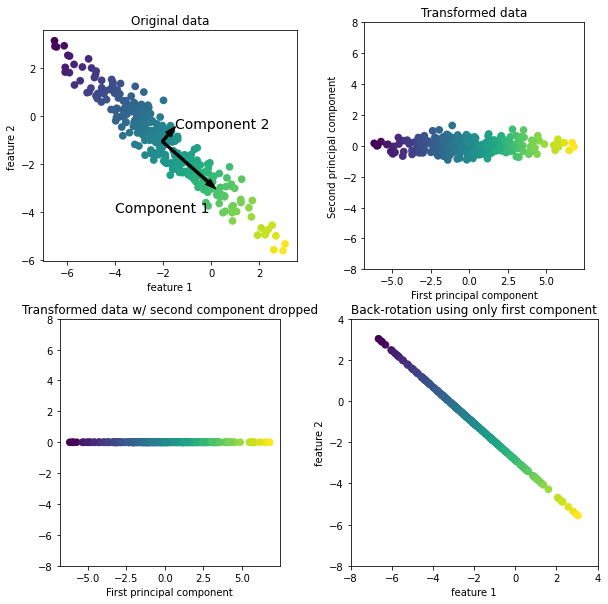

In [117]:
mglearn.plots.plot_pca_illustration()

1. 왼쪽 위 그래프(원본 데이터)는 원본 샘플을 색으로 구분해서 표시한 것입니다. 먼저 '성분 1'이라고 쓰여 있는 분산이 가장 큰 방향을 찾습니다. 이 방향(벡터, vector)이 데이터에서 가장 많은 정보를 담은 방향이며 특성들의 상관관계가 가장 큰 방향입니다. 그리고 첫 번째 방향과 직각인 방향 중에서 가장 많은 정보를 가진 방향을 찾습니다. 2차원에서는 직각 방향이 하나지만 고차원에서는 수많은 직각 방향이 존재할 수 있습니다. 기실 화살표 방향은 전혀 의미가 없는데, 화살표를 중앙에서 오른쪽 아래 방향으로 그리든 왼쪽 위로 향하게 그리든 아무 상관이 없습니다. 이 과정들을 거쳐서 찾은 방향을 데이터에 있는 주된 분산의 방향이라고 하며 '주성분(principal component)'이라고 명명합니다. 원본 특성 개수만큼 주성분이 있다고 생각하면 됩니다(특정 개수보다 많은 주성분을 설정하거나, 지정된 주성분보다 샘플 개수가 적을 때 에러가 발생합니다).

1. 오른쪽 위 그래프(변환된 데이터)는 주성분 1과 주성분 2를 x축과 y축에 수평 형태로 회전시킨 것입니다. 회전하기 전에 데이터에서 평균을 빼서 중심을 원점에 맞췄습니다. `PCA`로 회전시킨 이 두 축은 연관성이 없으므로 변환된 데이터의 '상관관계 행렬(correlation matrix)'이 대각선 방향을 제외하면 0이 됩니다. 상관관계 행렬은 공분산 행렬을 정규화한 것으로 `PCA`로 변환한 데이터가 'X_pca'라고 할 때 `np.corrcoef(X_pca.T)` 형식으로 구할 수 있습니다. 이 행렬의 대각선 방향은 `PCA`에 의해 만들어진 특성 자신과의 관계를 가지므로 1이 됩니다.

1. 왼쪽 아래 그래프(두 번째 주성분을 제거한 변환된 데이터)는 주성분의 일부만 남기는 '차원 축소'로 사용할 수 있는 `PCA`를 통해 첫 번째 주성분만 유지시키고, 2차원 데이터셋을 1차원 데이터셋으로 차원을 감소시킨 것입니다. 다만 이것은 원본 특성 중에 하나만 남기는 것을 의미하는 것이 아닙니다. 가장 유용한 방향을 찾아서 그 방향의 성분인 첫 번째 주성분을 유지하는 것입니다(첫 번째 그래프에서 오른쪽 아래로 향하는 성분을 의미합니다).

1. 오른쪽 아래 그래프(첫 번째 주성분만 사용하여 회전 복원)는 데이터에 다시 평균을 더하고 반대로 회전시킨 것입니다. 이 샘플들은 원래 특성 공간에 놓여 있지만 첫 번째 주성분의 정보만 가지고 있습니다. 이 변환은 데이터에서 노이즈를 제거하거나 주성분에서 유지되는 정보를 시각화하는 데 자주 사용합니다.

### PCA를 적용해 유방암 데이터셋 시각화하기

`PCA`가 가장 널리 사용되는 분야는 고차원 데이터셋을 시각화하는 케이스입니다. 1장에서 서술했듯이 특성을 세 개 이상 가진 데이터를 산점도로 표현하기란 쉬운 일이 아닙니다. 유방암 데이터셋의 경우 특성이 30개가 되므로 $30 \times 14.5 = 435$개만큼 산점도를 그려야 합니다. 정확하게 계산하면 특성 30개에서 두 개씩 짝지으므로 $\begin{pmatrix} 30\\ 2\\ \end{pmatrix}=\frac{30!}{2!(30-2)!}=30 \times \frac{29!}{2! \times 28!}=30 \times 14.5=435$개의 산점도가 그려집니다. 산점도 행렬은 대각선 부분에 히스토그램이 그려지고 대각선을 기준으로 대칭 형태입니다.

양성과 악성 클래스에 대해 각 특성의 히스토그램을 그립니다.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Unrecognized location 'beat'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50501 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50577 missing from current font.
  font.set_text(s, 0.0, flags=flags)


<function matplotlib.pyplot.show>

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50501 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50577 missing from current font.
  font.set_text(s, 0, flags=flags)


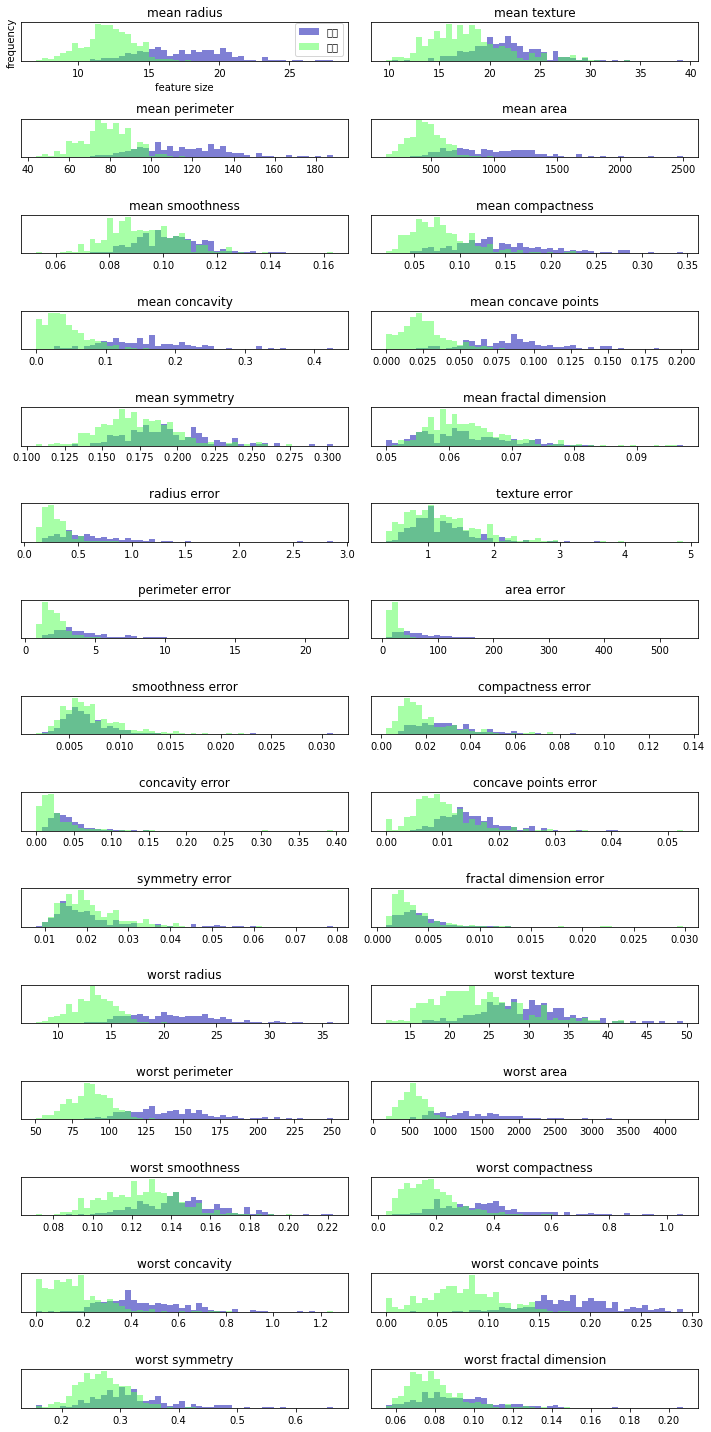

In [118]:
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

fig, axes = plt.subplots(15, 2, figsize=(10, 20))
ax = axes.ravel()

for i in range(30):
    # bin은 특정 간격을 의미합니다.
    # 특정 간격에 얼마나 많은 샘플이 나타나는지 횟수를 센 것입니다.
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())

ax[0].set_xlabel('feature size')
ax[0].set_ylabel('frequency')
ax[0].legend(['악성', '양성'], loc='beat')
fig.tight_layout()
plt.show

위 그래프들은 각 특성에 대한 히스토그램이며, 특정 간격에 얼마나 많은 샘플이 나타나는지 횟수를 센 것입니다. 각 그래프는 히스토그램 두 개를 겹쳐놓은 것입니다. 연두색은 양성 클래스, 보라색은 악성 클래스를 의미합니다.

몇 가지 특성을 예로 들어 설명합니다. 'smoothness error' 특성은 두 클래스가 거의 겹쳐 있어서 쓸모가 없습니다. 하지만 'worst concave points'는 두 클래스가 명확히 구분된 편이므로 유용한 특성이라고 할 수 있습니다.

다만 이 그래프들은 특성들의 상호작용이나 이 상호작용이 클래스와 어떤 관련이 있는지 알려주지는 못합니다. 이 상황에서 `PCA`를 사용하면 주요 상호작용을 찾아낼 수 있으므로 더 나은 그림을 만들 수 있습니다. 

처음 두 개의 주성분을 찾아서 2차원 공간에 산점도로 데이터를 시각화합니다. `PCA`를 적용하기 전에 데이터 스케일을 조정해야 하는데, `StandardScaler`를 사용해서 각 특성의 분산을 1로 만듭니다. 특성의 스케일이 다르면 올바른 주성분 방향을 찾을 수 없기 때문에 반드시 이런 표준값으로 바꿔야 합니다.

In [119]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

`PCA` 변환을 학습하고 적용하는 것은 데이터 전처리만큼 간단합니다. `PCA` 객체를 생성하고, `fit` 메서드를 호출해서 주성분을 찾고, `transform` 메서드를 호출해서 데이터를 회전시켜서 차원을 축소합니다. 참고로 `PCA`에서는 '특잇값 분해(SVD)' 방식을 사용하여 주성분을 찾습니다. 먼저 `fit` 메서드에서 사이파이의 `linalg.svd` 함수를 이용해서 U, s, V 배열을 구하고, `transform` 메서드에서 입력 데이터와 주성분 V 행렬의 전치행렬을 곱하여 변환된 데이터를 구합니다. 근데 이 값은 U와 s를 곱해도 구할 수 있습니다. `fit_transform` 메서드에서는 U와 s를 사용해서 변환된 데이터를 계산하며, 차원이 많은 데이터에서 주성분 몇 개만 고르면 성능이 더 좋습니다. `singular_values_` 속성에 특잇값 s가 저장됩니다.

아무튼 `PCA`는 기본값일 때 데이터를 회전하고 이동만 시키며 모든 주성분을 그대로 유지합니다. 데이터 차원을 줄이려면 `PCA` 객체를 만들 때 얼마나 많은 성분을 유지할지 사전에 알려줘야 합니다.

In [120]:
from sklearn.decomposition import PCA
# 데이터의 처음 두 개 주성분만 유지시킵니다.
pca = PCA(n_components=2)
# 유방암 데이터로 PCA 모델을 만듭니다.
pca.fit(X_scaled)

# 처음 두 개의 주성분을 사용하여 데이터를 변환합니다.
X_pca = pca.transform(X_scaled)
print('원본 데이터 형태:', X_scaled.shape)
print('축소 처리된 데이터 형태:', X_pca.shape)

원본 데이터 형태: (569, 30)
축소 처리된 데이터 형태: (569, 2)


처음 두 개의 주성분을 그립니다.

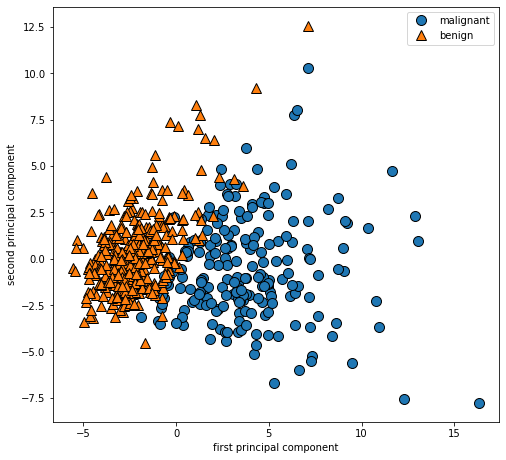

In [121]:
# 클래스를 색깔로 구분합니다.
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(['malignant', 'benign'], loc='best')
plt.gca().set_aspect('equal')
plt.xlabel('first principal component')
plt.ylabel('second principal component')
plt.show()

`PCA`는 비지도 학습이므로 회전축을 찾을 때 어떤 클래스 정보도 사용하지 않고 데이터간 상관관계만 고려합니다. 위 그래프를 보면 두 클래스가 2차원 공간에서 꽤 잘 구분되는 것을 확인할 수 있습니다. 마치 선형 분류기로도 두 클래스를 잘 구분할 것으로 보입니다. 악성 포인트가 넓게 분포되어 있는 것은 위 히스토그램에서도 나타난 결과입니다.

`PCA`의 단점은 그래프의 두 축을 해석하기가 쉽지 않다는 점입니다. 주성분은 원본 데이터에 있는 어떤 방향에 대응하는 여러 특성이 조합된 매우 복잡한 형태입니다. `PCA` 객체가 학습될 때(`fit` 메서드가 호출될 때) `components_` 속성에 주성분이 저장됩니다. 이 속성의 각 행은 주성분 하나씩을 나타내고 중요도에 따라 정렬되어 있습니다. 맨 처음 주성분은 가장 위에 나타납니다. 각 열은 원본 데이터의 특성에 대응하는 값입니다. 이 예에서는 'mean_radius'와 'mean texture' 등입니다.

`components_` 속성을 출력합니다.

In [122]:
print('PCA 주성분:', pca.components_)
print('PCA 주성분 형태:', pca.components_.shape)

PCA 주성분: [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]
PCA 주성분 형태: (2, 30)


이 값을 히트맵으로 시각화하면 이해하기 수월합니다.

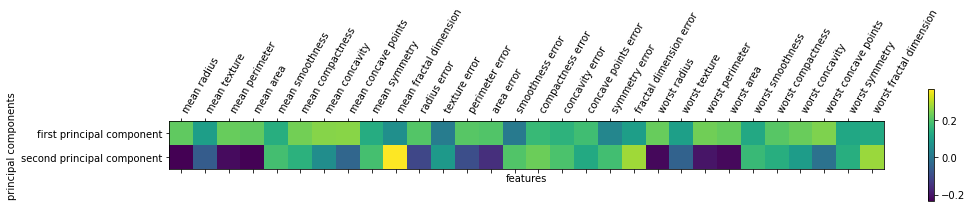

In [123]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ['first principal component', 'second principal component'])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60, ha='left')
plt.xlabel('features')
plt.ylabel('principal components')
plt.show()

첫 번째 주성분의 모든 특성은 부호(양수)가 같습니다(주성분의 화살표 방향은 무의미합니다). 모든 특성의 부호가 같다는 건 공통의 상호관계가 존재한다는 의미입니다. 한 특성의 값이 커지면 다른 값들도 따라서 높아질 것입니다. 두 번째 주성분은 부호가 섞여 있습니다. 두 주성분 모두 특성 30개가 있고 모든 특성이 섞여 있어서 의미를 구체적으로 설명하기는 어렵습니다.

### 고유얼굴(eigenface) 특성 추출

`PCA`는 특성 추출에도 사용합니다. 특성 추출은 원본 데이터 표현보다 분석하기에 더 적합한 표현을 찾을 수 있을 거라는 생각에서 시작됐습니다. 이미지(적색, 녹색, 청색(RGB)의 강도가 기록된 픽셀로 구성되며, 이미지에 담긴 물체는 수천 개의 픽셀로 이뤄집니다)를 다루는 애플리케이션은 특성 추출이 도움이 됩니다.

`PCA`를 이용해서 여러 유명 인사들의 얼굴 이미지를 담은 LFW(Labeled Faces in the wild) 데이터셋의 얼굴 이미지에서 특성을 추출하는 간단한 애플리케이션을 만듭니다. 처리 속도를 제고하고자 흑백 이미지를 사용하고 스케일을 줄입니다.

샘플 몇 개를 출력합니다. 여기서 `fetch_lfw_people` 함수는 기본값으로 흑백 이미지를 사용하고, 컬러 이미지를 사용하려면 `color=True`로 매개변수를 지정해야 합니다.

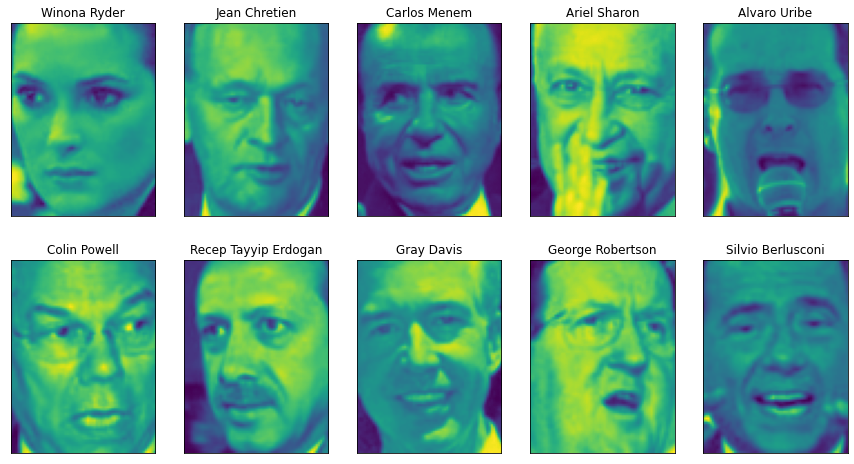

In [124]:
from sklearn.datasets import fetch_lfw_people

people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})

for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])
plt.show()

LFW 데이터셋에는 62명의 얼굴을 담은 이미지가 총 3,023개가 있고 각 이미지는 $87 \times 65$ 픽셀입니다.

In [125]:
print('people.images.shape', people.images.shape)
print('클래스(얼굴) 개수:', len(people.target_names))

people.images.shape (3023, 87, 65)
클래스(얼굴) 개수: 62


데이터셋을 살펴보면 다소 편중된 자료라는 점을 알 수 있습니다. 조지 부시(George W Bush)와 콜린 파월(Colin Powell)의 이미지가 지나치게 많습니다.

In [126]:
# 각 타깃이 나타난 횟수를 계산합니다.
counts = np.bincount(people.target)
# 타깃별 이름과 횟수를 출력합니다.
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print('{0:25}{1:3}'.format(name, count), end='   ')
    if (i + 1) % 3 == 0:
        print()

Alejandro Toledo          39   Alvaro Uribe              35   Amelie Mauresmo           21   
Andre Agassi              36   Angelina Jolie            20   Ariel Sharon              77   
Arnold Schwarzenegger     42   Atal Bihari Vajpayee      24   Bill Clinton              29   
Carlos Menem              21   Colin Powell             236   David Beckham             31   
Donald Rumsfeld          121   George Robertson          22   George W Bush            530   
Gerhard Schroeder        109   Gloria Macapagal Arroyo   44   Gray Davis                26   
Guillermo Coria           30   Hamid Karzai              22   Hans Blix                 39   
Hugo Chavez               71   Igor Ivanov               20   Jack Straw                28   
Jacques Chirac            52   Jean Chretien             55   Jennifer Aniston          21   
Jennifer Capriati         42   Jennifer Lopez            21   Jeremy Greenstock         24   
Jiang Zemin               20   John Ashcroft             53 

데이터셋의 편중을 제거하려면 사람마다 특정 개수의 이미지를 공통적으로 정해서 선택해야 합니다. 아래 코드에서 각 50개씩만 선택합니다.

In [127]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1

X_people = people.data[mask]
y_people = people.target[mask]

# 0~255 사이의 흑백 이미지의 픽셀 값을 0~1 스케일로 조정합니다.
X_people = X_people / 255.

얼굴 인식은 새로운 얼굴 이미지가 데이터베이스에 있는 기존 얼굴 중에 하나에 속하는지 찾는 작업입니다. 사진 애플리케이션, 소셜 미디어, 보안 애플리케이션을 예로 들 수 있습니다. 해결 방법 중에 하나를 제시하자면 각 사람을 서로 다른 클래스로 구분하는 분류기를 만드는 것입니다. 그러나 얼굴 데이터베이스에는 사람의 수는 많지만 각 사람에 대한 이미지는 적습니다(클래스별 훈련 데이터가 적습니다). 이런 문제 때문에 분류기 대부분을 훈련시키기 난해합니다. 무엇보다도 대규모 모델을 다시 훈련시키지 않고도 새로운 사람의 얼굴을 쉽게 추가할 수 있어야 합니다.

이를 위해 분류하려는 얼굴과 가장 유사한 이미지를 찾는 1-최근접 이웃 분류기를 사용할 수 있습니다. 이 분류기는 원칙적으로 클래스마다 훈련 샘플 하나를 사용합니다.

`KneighborsClassifier` 클래스를 적용합니다.

In [128]:
from sklearn.neighbors import KNeighborsClassifier
# 훈련 세트와 테스트 세트로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0)
# `KNeighborsClassifier` 모델을 만듭니다.
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print('1-최근접 이웃의 테스트 세트 점수: {:.2f}'.format(knn.score(X_test, y_test)))

1-최근접 이웃의 테스트 세트 점수: 0.23


정확도가 0.23이면 네 번에 한 번 정도 바르게 인식하는 정확도입니다. 형편없다고 볼 수는 없지만 마냥 좋지도 않습니다. 

얼굴의 유사도를 측정하기 위해 원본 픽셀 공간에서 거리를 계산하는 것(각 픽셀의 값을 다른 이미지에서 동일한 위치에 있는 픽셀 값과 비교하는 방식)은 결코 옳지 않습니다. 이런 방식은 사람이 직접 얼굴 이미지를 인식하는 것과 많이 다릅니다. 예를 들면 픽셀을 비교할 때 얼굴 위치가 한 픽셀만 오른쪽으로 이동해도 큰 차이를 만들어 내면서 전혀 다른 얼굴로 인식하게 됩니다. 고로 `PCA`의 '백색화(whitening, 주로 화이트닝으로 지칭합니다)' 옵션을 사용해서 주성분의 스케일이 같아지도록 조정해야 합니다. 이는 화이트닝 옵션을 사용하지 않고 변환한 후에 `StandardScaler` 클래스를 적용하는 것과 같은 방식입니다.

주석으로 달린 내용을 제시하자면, `PCA`로 변환된 데이터의 표준편차는 `linalg.svd` 함수에서 반환한 특잇값 배열 s를 샘플 개수의 제곱근으로 나누어 구할 수 있습니다. 화이트닝 옵션은 `PCA` 변환을 할 경우에 이 표준편차를 나누어서 적용합니다. `PCA` 변환은 데이터의 평균을 0으로 만드므로, 화이트닝 옵션을 적용하는 방식은 `PCA` 변환을 하고 나서 `StandardSCaler`를 적용하는 방식과 같습니다.

위 데이터를 이용해서 화이트닝 옵션으로 데이터를 회전시키는 것뿐만 아니라 스케일도 조정하면 그래프가 원 모양으로 바뀝니다.

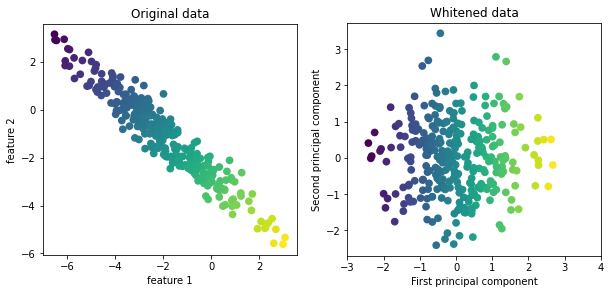

In [129]:
mglearn.plots.plot_pca_whitening()

`PCA` 객체를 훈련 데이터로 학습시켜서 처음 100개의 주성분을 추출합니다. 그리고 훈련 데이터와 테스트 데이터를 변환합니다.

In [130]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print('X_train_pca.shape:', X_train_pca.shape)

X_train_pca.shape: (1547, 100)


새 데이터는 처음 100개의 주성분에 해당하는 특성을 가집니다.

1-최근접 이웃 분류기로 이미지를 분류합니다.

In [131]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print('테스트 세트 정확도: {:.2f}'.format(knn.score(X_test_pca, y_test)))

테스트 세트 정확도: 0.31


정확도가 23%에서 8%만큼 향상됐습니다. 주성분이 데이터를 더 잘 표현한다고 판단할 수 있습니다.

이미지 데이터는 계산한 주성분을 쉽게 시각화할 수 있습니다. 입력 차원은 $87 \times 65$픽셀의 흑백 이미지이고, 이 공간의 어떤 방향이든 $87 \times 65$픽셀의 흑백 이미지입니다. 5,655개의 각 픽셀은 0~1 사이의 회색톤 값을 가진 하나의 차원입니다. `PCA`의 주성분의 특성 개수는 항상 입력 데이터의 차원과 같습니다. 이렇게 얼굴 이미지에서 구한 주성분을 다시 이미지로 나타낸 것을 특별히 고유얼굴(eigenface)이라고 합니다.

In [132]:
print('pca.coponents_.shape:', pca.components_.shape)

pca.coponents_.shape: (100, 5655)


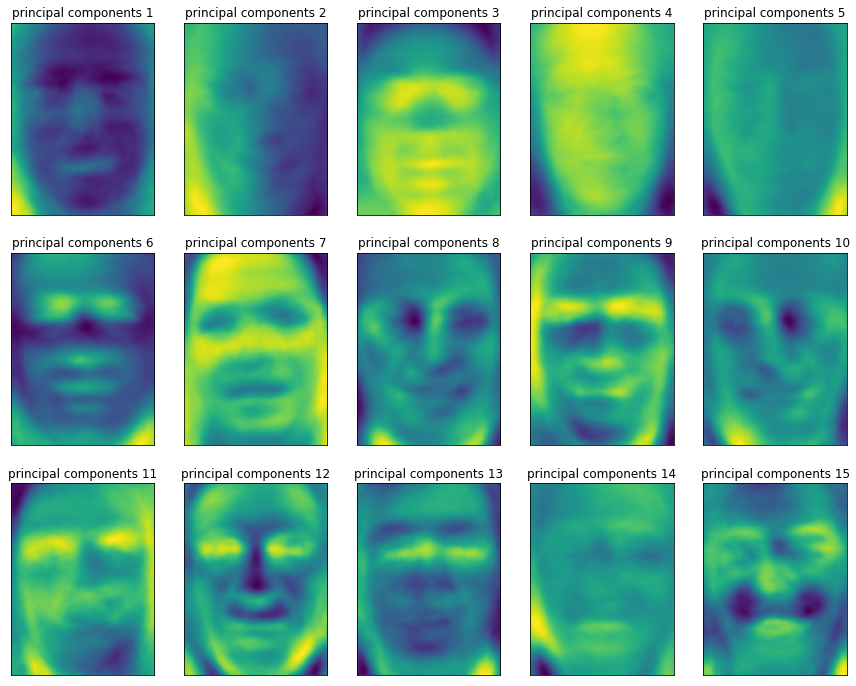

In [133]:
fig, axes = plt.subplots(3,5, figsize=(15, 12),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap='viridis')
    ax.set_title('principal components {}'.format((i + 1)))

plt.show()

이 주성분들을 완전히 이해하긴 어렵지만 몇몇 주성분이 잡아낸 얼굴 이미지의 특징을 짐작할 수 있습니다. 예를 들면 첫 번째 주성분은 얼굴과 배경의 명암 차이를 나타내고, 두 번째 주성분은 오른쪽과 왼쪽 조명의 차이를 나타냅니다. 이런 방식이 원본 픽셀 값을 사용하는 것보다 더 의미가 있지만 사람이 얼굴을 인식하는 방식과는 다릅니다. `PCA` 모델은 픽셀을 기반으로 하므로 눈, 볼, 코의 위치 같은 얼굴의 요소와 조명이 두 이미지가 얼마나 비슷한지 판단하는 데 큰 영향을 줍니다.

`PCA` 변환에 대한 다른 해석 방법은 샘플을 주성분의 가중치 합으로 나타내는 데 필요한 수치(`PCA` 변환 뒤의 새로운 특성값)를 찾는 것으로 해석할 수 있습니다. 샘플 데이터($1 \times 5,655$)에 주성분의 전치행렬($5,655 \times 100$)을 곱하면 100개의 새로운 특성 값을 얻습니다. 이 새로운 특성값($1 \times 100$)에 주성분($100 \times 5,655$)을 곱하면 원본 샘플($1 \times 5,655$)를 얻을 수 있습니다. `PCA`로 구한 특성과 주성분의 가중치 합으로 원본 샘플을 표현한다고 말할 수 있습니다.

`PCA` 변환에 대한 또다른 해석 방법은 몇 개의 주성분을 사용해서 원본 데이터를 재구성하는 것입니다. 주성분 분석 파트의 처음에 제시했던 그래프처럼 같은 방식으로 얼굴 데이터셋에 적용해서 몇 개의 주성분으로 데이터를 줄이고 원래 공간으로 되돌릴 수 있습니다. `invers_transform` 메서드를 사용하여 원래 특성 공간으로 되돌리는 작업을 수행합니다.

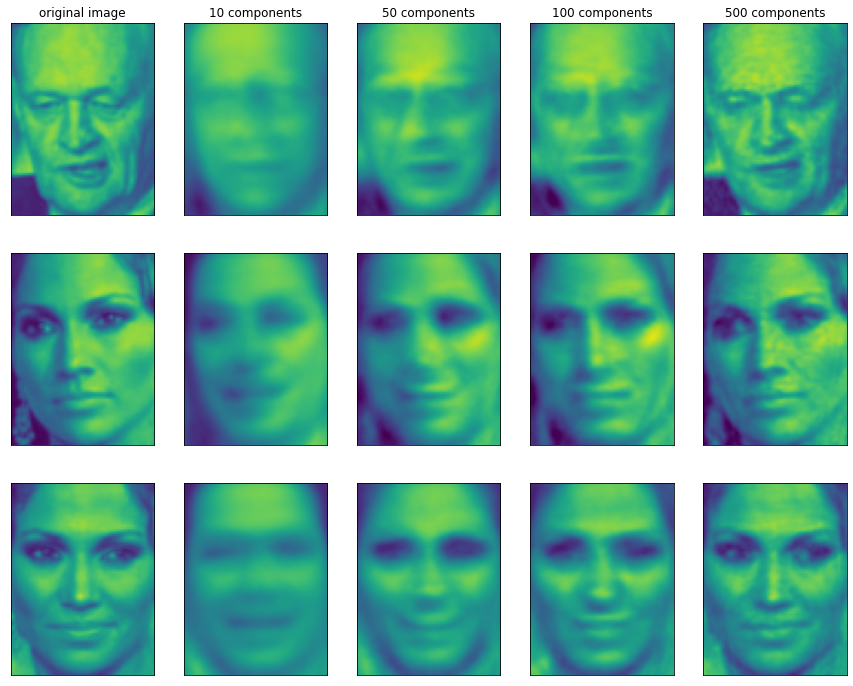

In [134]:
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

주성분을 10개만 사용했을 땐 얼굴 각도, 조명 같은 기본 요소만 나타납니다. 주성분을 더 많이 사용하면 이미지가 더 상세하게 표현됩니다. 주성분을 픽셀 수만큼 사용하면 변환한 후에 아무 정보도 잃지 않게 되어 이미지를 완전하게 재구성할 수 있습니다.

`PCA`의 처음 두 성분을 사용해서 전체 데이터를 클래스로 구분해서 산점도에 나타낼 수 있습니다.

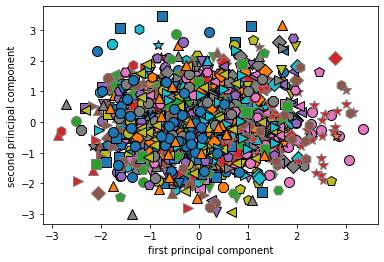

In [135]:
mglearn.discrete_scatter(X_train_pca[:, 0], X_train_pca[:, 1], y_train)
plt.xlabel('first principal component')
plt.ylabel('second principal component')
plt.show()

주성분을 두 개만 사용하면 전체 데이터가 한 덩어리로 뭉쳐 있어서 클래스를 구분하기가 명확하지 않습니다. 위 그림에서 주성분 10개를 사용할 경우에 얼굴의 대략적인 특징만 잡은 사례를 비추어 보면 클래스 구분이 명확하지 않은 건 당연한 결과입니다.

## 3.4.2 비음수 행렬 분해(NMF)

'NMF(non-negative matrix factorization)'는 유용한 특성을 뽑아내기 위한 또 다른 비지도 학습 알고리즘입니다. 이 알고리즘은 `PCA`와 하고 비슷하고 차원 축소에도 사용할 수 있습니다. 위 그림에서의 `PCA`처럼 어떤 성분의 가중치 합으로 각 샘플을 나타낼 수 있습니다. 다만 `PCA`에서는 데이터의 분산이 가장 크고 수직인 성분을 찾았지만 `NMF`에서는 음수가 아닌 성분과 계수 값을 찾습니다. 다시 말하면 주성분과 계수 모두 0보다 크거나 같아야 합니다. 음수가 아닌 주성분과 계수의 가중치 합은 음수가 되지 않으므로 음수가 아닌 특성을 가진 데이터에만 적용할 수 있습니다.

음수가 아닌 가중치 합으로 데이터를 분해하는 기능은 여러 사람의 목소리가 담긴 오디오 트랙이나 여러 악기로 이뤄진 음악처럼 독립된 소스를 추가하여(덮어써서) 만들어진 데이터에 특히 유용합니다. 이런 경우에 `NMF`는 섞여 있는 데이터에서 원본 성분을 구분할 수 있습니다. 음수로 된 성분이나 계수가 만드는 상쇄 효과를 이해하기 어려운 `PCA`보다 `NMF`의 주성분이 해석하기에 수월합니다. 예를 들면 위 그림(주성분 1부터 15까지 나타낸 그림)의 고유얼굴(eigenface)은 양수와 음수 값을 모두 가지고 있지만 이 부호는 실제로 아무런 규칙이 없습니다.

응용 사례로는 텍스트 마이닝, 스펙트럼 데이터 분석, 생물 정보 공학, 인터넷 거리 예측 등에 사용됩니다.

### 인위적 데이터에 NMF 적용하기

`PCA`와는 달리 `NMF`를 다루려면 주어진 데이터가 양수인지 여부를 확인해야 합니다. 데이터가 원점인 (0,0)에서 상대적으로 어디에 놓여 있는지 중요하기 때문입니다. 따라서 원점인 (0, 0)에서 데이터로 가는 방향을 추출한 것을 통해 음수가 미포함된 성분을 이해할 수 있습니다.

2차원 예제 데이터에 `NMF`를 적용합니다.

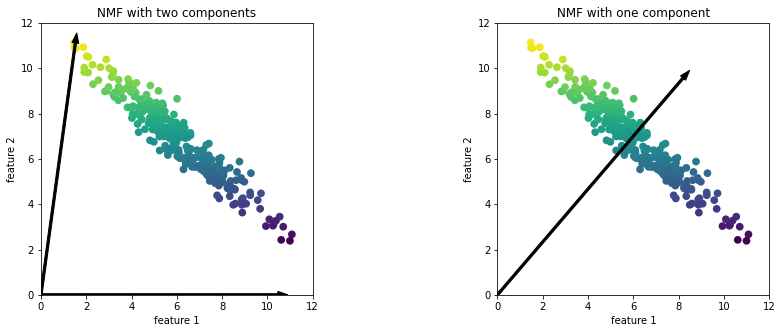

In [136]:
mglearn.plots.plot_nmf_illustration()

왼쪽은 성분이 두 개인 `NMF`입니다. 데이터셋의 모든 포인트를 양수로 이뤄진 두 개의 성분으로 표현할 수 있습니다. 데이터를 완벽하게 재구성할 수 있을 만큼 성분이 많다면(특성 개수만큼 많다면) 알고리즘은 데이터의 각 특성의 끝에 위치한 포인트를 가리키는 방향을 택할 것입니다. 입력 데이터가 X, 변환 데이터가 W, 성분이 H일 때, X = WH를 만족하는 W, H 행렬을 구하고자 행렬의 L2 노름인 '프로베니우스 노름(Frobenius norm)'의 제곱으로 만든 목적 함수 $\frac{1}{2}\displaystyle\sum_{ij}(X_{ij}-WH_{ij})^2$을 좌표 하강법으로 최소화합니다. 구해진 성분 H는 `NMF` 객체의 `components_` 속성에 저장됩니다. `solver` 매개변수의 기본값은 좌표 하강법을 사용하는 `cd`입니다. `mu`는 곱셈 업데이트 알고리즘입니다.

성분 하나만 사용한다면 `NMF`는 데이터를 가장 잘 표현할 수 있는 평균으로 향하는 성분을 만듭니다. `PCA`와는 반대로 성분 개수를 줄이면서 특정 방향을 제거하고 전체 성분을 완전히 바꿉니다. `NMF`에서 성분은 어떤 특정 방식으로 정렬되어 있지 않고 모든 성분을 동등하게 취급합니다. 첫 번째 비음수 성분 같은 게 없습니다.

아울러 무작위로 초기화하기 때문에 난수 생성 초깃값에 따라 결과가 달라집니다. 성분 두 개로 모든 데이터를 완벽하게 나타낼 수 있는 위와 같은 예에서는 성분의 크기나 순서가 바뀔 수는 있지만 난수가 거의 영향을 주지 않습니다. 물론 복잡한 경우에는 큰 차이를 만들기도 합니다.

`NMF`에서 초기화 방식을 지정하는 `int` 매개변수의 기본값은 `None`입니다. `n_components`가 샘플이나 특성 개수보다 작을 경우에는 `nndsvd`를 사용하고, 그렇지 않으면 `random`을 사용합니다.

`nndsvd`는 특잇값 분해로 얻은 U와 V 행렬의 절댓값에 S 행렬의 제곱근을 곱해서 W와 H 행렬을 만들고, W와 H 행렬에서 1e-6보다 작은 값은 0으로 만듭니다. `nndsvd`는 0을 입력 행렬의 평균값으로 바꿉니다. 사이킷런 1.1 버전부터는 기본값이 `nndsvda`로 바뀝니다.

`random`은 데이터 평균을 성분의 개수로 나눈 후에 제곱근을 구하고, 정규분포의 난수를 발생시켜서 앞에서 구한 제곱근을 곱하여 H와 W 행렬을 만듭니다. 이를 통해 평균값을 각 성분과 두 개의 행렬에 나누어 좋은 효과를 냅니다.

### 얼굴 이미지에 NMF 적용하기

LFW 데이터셋에 `NMF`를 적용합니다. 핵심 매개변수는 추출할 성분 개수입니다. 대개 이 값은 특성 개수보다 작습니다. 그렇지 않으면 픽셀 하나가 성분 두 개로 나뉘어 표현될 수 있습니다.

`NMF`를 사용해서 데이터를 재구성합니다. 성분 개수가 미치는 영향에 대해 살핍니다.

In [137]:
# 실행하면 출력하기까지 오래 걸리는 셀입니다. 
# 주석으로 처리해뒀으니 가능한 한 서적을 참고하시기 바랍니다.
# mglearn.plots.plot_nmf_faces(X_train, X_test[:3], image_shape)

변환을 되돌린 결과는 `PCA`를 사용할 경우와 비슷하지만 품질이 더 떨어집니다. `PCA`가 재구성 측면에서 최선의 방향을 찾기 때문입니다. `NMF`는 데이터를 인코딩하거나 재구성하는 용도로 사용하기 보다는 주로 데이터에 있는 유용한 패턴을 찾는 데 활용합니다.

얼굴 데이터셋에서 NMF로 찾은 성분 15개를 추출합니다.

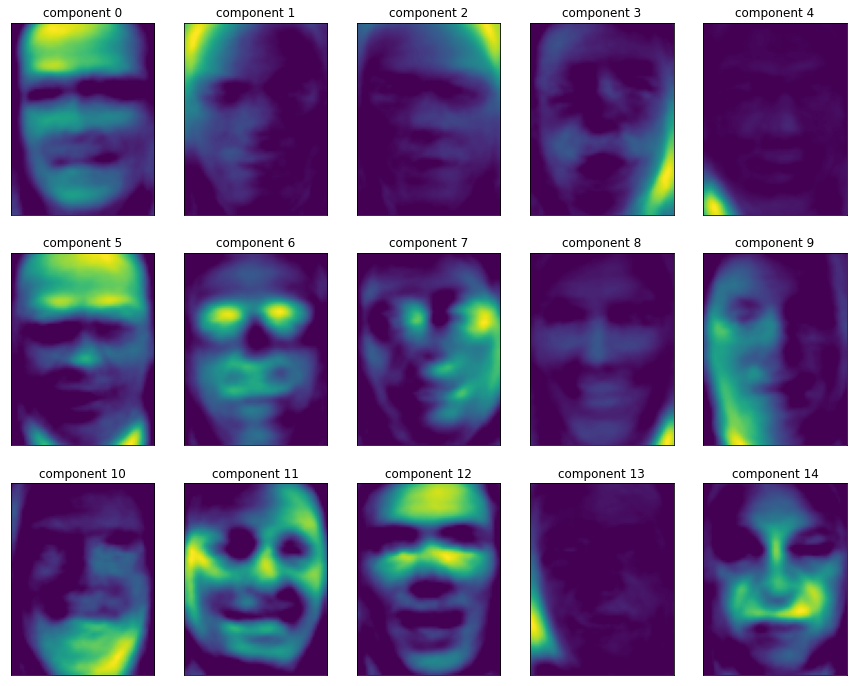

In [138]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=15, random_state=0, max_iter=1000, tol=1e-2)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

fig, axes = plt.subplots(3, 5, figsize=(15, 12),
                         subplot_kw={'xticks': (), 'yticks': ()})

for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title('component {}'.format(i))

이 성분들은 모두 양수 값이어서 `PCA` 성분보다 훨씬 더 원형으로 보입니다. 성분 3은 오른쪽으로 약간 돌아간 얼굴처럼 보이고, 성분 7은 왼쪽으로 약간 회전한 얼굴로 보입니다.

먼저 성분 3에 대한 이미지를 출력합니다.

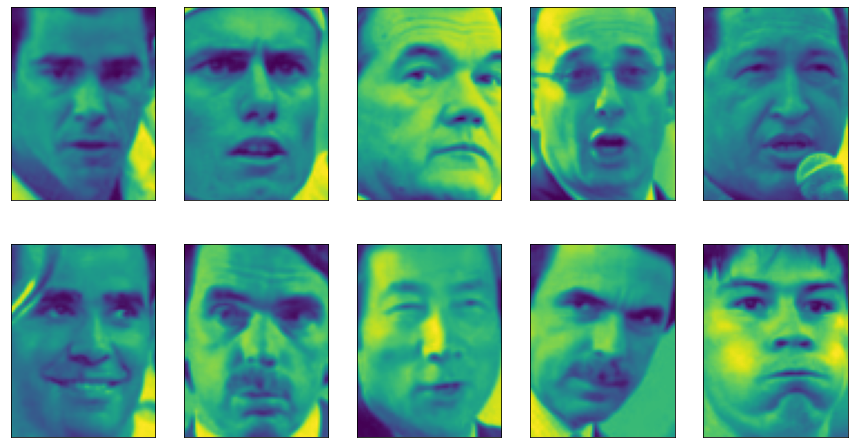

In [139]:
compn = 3
# 4번째 성분으로 정렬하여 처음 10개 이미지를 출력합니다.
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})

for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

성분 3에 대한 계수 값이 큰 얼굴들은 오른쪽으로 돌아간 형태입니다.

다음올 성분 7에 대한 이미지를 출력합니다.

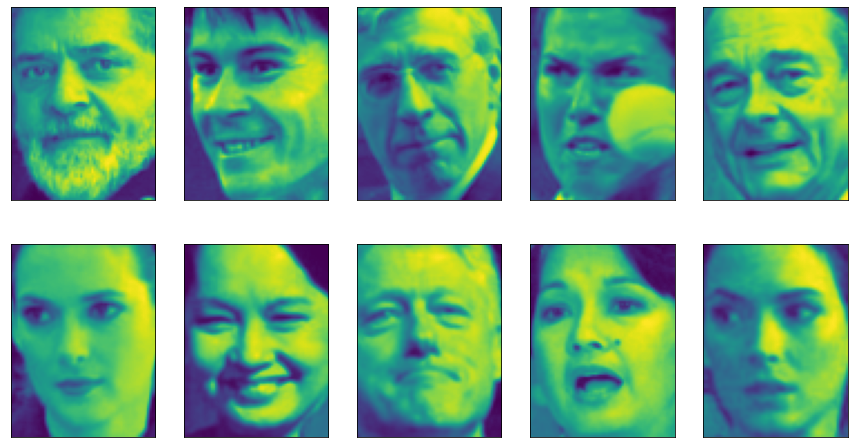

In [140]:
compn = 7
# 8번째 성분으로 정렬하여 처음 10개 이미지를 출력합니다.
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})

for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

성분 7에 대한 계수 값이 큰 얼굴들은 왼쪽으로 돌아간 형태입니다.   
앞에서 설명한 바처럼 이와 같은 패턴을 추출하는 것은 소리, 유전자 표현, 텍스트 데이터처럼 덧붙이는 구조를 가진 데이터에 적합합니다. 아래에서 인위적인 데이터셋을 사용한 예를 제시하여 자세히 설명합니다.

서로 다른 입력 세 개로부터 합성된 원본 신호를 출력합니다.

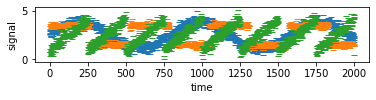

In [141]:
S = mglearn.datasets.make_signals()
plt.figure(figsize=(6, 1))
plt.plot(S, '_')
plt.xlabel('time')
plt.ylabel('signal')
plt.show()

원본 신호는 볼 수 없습니다. 세 개가 섞인 신호만 관찰할 수 있습니다. 따라서 섞인 신호를 원본 신호를 복원해야 합니다. 이 신호를 여러 방법(예컨대 측정 장치 100개)으로 관찰할 수 있고, 각 장치는 일련의 데이터를 제공한다고 가정합니다.

In [142]:
# 원본 데이터를 사용해서 측정 데이터 100개를 만듭니다.
A = np.random.RandomState(0).uniform(size=(100, 3))
X = np.dot(S, A.T)
print('측정 데이터 형태:', X.shape)

측정 데이터 형태: (2000, 100)


`NMF`를 사용해서 신호 세 개를 복원합니다.

In [143]:
nmf = NMF(n_components=3, init='nndsvd', tol=1e-2, max_iter=1000, random_state=42)
S_ = nmf.fit_transform(X)
print('복원한 신호 데이터 형태:', S_.shape)

복원한 신호 데이터 형태: (2000, 3)


비교를 위해 `PCA`에도 적용합니다.

In [144]:
pca = PCA(n_components=3)
H = pca.fit_transform(X)

`NMF`와 `PCA`로 찾은 신호를 나타냅니다.

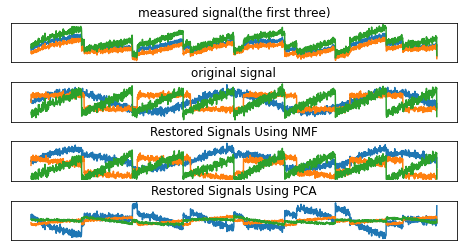

In [145]:
models = [X, S, S_, H]
names = ['measured signal(the first three)',
         'original signal',
         'Restored Signals Using NMF',
         'Restored Signals Using PCA']

fig, axes = plt.subplots(4, figsize=(8, 4), gridspec_kw={'hspace': .5},
                         subplot_kw={'xticks': (), 'yticks': ()})

for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:, :3], '-')

X에 담긴 측정 데이터 100개 중에 처음 3개를 함께 그래프로 나타냈습니다.   
`NMF`는 원본 신호를 (완벽하진 않지만)잘 복원했습니다. 이 예제에서는 성분의 순서가 원본 신호와 같게 출력됐지만, 기실 `NMF`를 통해 생성된 성분은 순서가 없습니다.      
`PCA`는 완전히 실패했습니다. 대부분의 데이터 변동을 첫 번째 성분(맨 뒤에서 파란색을 취하는 커브)만을 사용해서 나타냈습니다.   

일정 개수의 성분을 사용하여 가중치 합으로 샘플을 분해할 수 있는 알고리즘은 책에서 제시하는 것 외에도 많습니다. '독립 성분 분석(`ICA`)', '요인 분석(`FA`)', '희소 코딩(sparse coding, dictionary learning, 딕셔너리 학습)'에 관하여 설명하는 [링크](http://scikit-learn.org/stable/modules/decomposition.html)를 참고하시기 바랍니다.

## 3.4.3 t-SNE를 이용한 매니폴드 학습

'매니폴드 학습(manifold learning)' 알고리즘이라고 부르는 시각화 알고리즘들은 훨씬 복잡한 매핑을 만들면서 더 좋은 시각화를 제공합니다. 이중에 '`TSNE`(t-SNE, t-Distributed Stochastic Neighbor Embedding)'를 가장 많이 사용합니다.

매니폴드 학습 알고리즘으로 시각화이기 때문에 3개 이상의 특성을 뽑는 경우는 거의 없습니다. t-SNE를 포함하여 일부 매니폴드 알고리즘들은 훈련 데이터를 새로운 표현으로 변환시키지만 새로운 데이터에는 적용하지 못합니다. 다시 말하면 테스트 세트에는 적용할 수 없고 단지 훈련했던 데이터만 변환할 수 있습니다. 그래서 매니폴드 학습은 탐색적 데이터 분석에 유용하지만 지도 학습용으로는 거의 사용하지 않습니다.

t-SNE의 아이디어는 샘플 사이의 거리를 가장 잘 보존하는 2차원 표현을 찾는 것입니다. 먼저 t-SNE는 각 샘플을 2차원에 무작위로 표현한 뒤에 원본 특성 공간에서 가까운 포인트는 가깝게 하고, 먼 포인트는 멀어지게 만듭니다. t-SNE는 멀리 떨어진 포인트간의 거리를 보존하는 것보다 가까이 있는 포인트에 더 큰 비중을 둡니다. 즉 이웃 샘플에 대한 정보를 보존합니다.

참고로 t-SNE는 쿨백-라이블러 발산(Kullback-Leibler divergence) 목적 함수를 최적화하기 위해 모멘텀을 적용한 배치 경사 하강법을 사용합니다. `TSNE`의 `method` 매개변수의 기본값은 `barnes_hut`입니다. 이는 그레이디언트 계산의 복잡도를 O(N$^2$)에서 O(NlogN)으로 낮춰주는 반스-헛(Barnes-Hut) 방법입니다. `exact` 옵션은 계산을 정확하게 하지만 속도가 느리므로 대규모의 데이터에 적합하지 않습니다.



사이킷런에 있는 손글씨 숫자 데이터셋에 t-SNE 매니폴드 학습을 적용합니다. 이 데이터셋의 각 포인트는 0에서 9 사이의 손글씨 숫자를 표현한 $8 \times 8$ 크기인 흑백 이미지입니다. 먼저 각 클래스의 샘플 이미지를 나타냅니다.

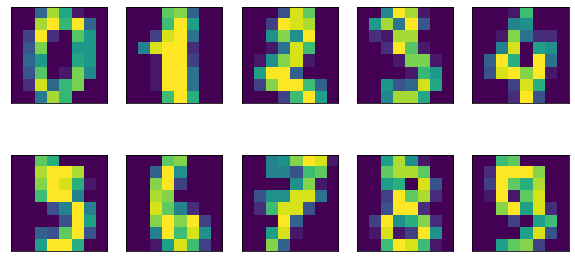

In [148]:
from sklearn.datasets import load_digits
digits = load_digits()

fig, axes = plt.subplots(2, 5, figsize=(10, 5),
                     subplot_kw={'xticks':(), 'yticks':()})

for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

`PCA`를 사용해서 데이터를 2차원으로 축소하고 시각화합니다. 처음 주성분 두 개를 이용해서 그래프를 그리고, 각 샘플을 해당하는 클래스의 숫자로 나타냅니다.

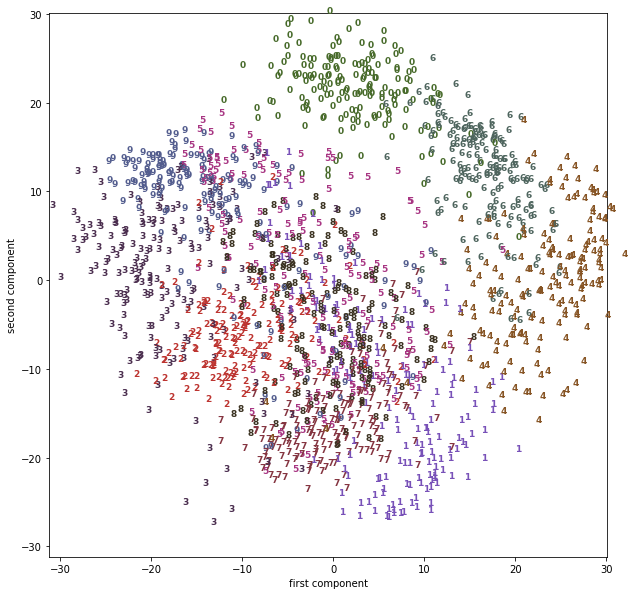

In [157]:
pca = PCA(n_components=2)
pca.fit(digits.data)
# 처음 두 개의 주성분으로 숫자 데이터를 변환합니다.
digits_pca = pca.transform(digits.data)
colors = ['#476A2A', '#7851B8', '#BD3430', '#4A2D4E', '#875525',
         '#A83683', '#4E655E', '#853541', '#3A3120', '#535D8E']
plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 1].max())
plt.ylim(digits_pca[:, 0].min(), digits_pca[:, 1].max())
plt.xlabel('first component')
plt.ylabel('second component')

for i in range(len(digits.data)):
    # 숫자 텍스트를 사용해서 산점도에 나타냅니다.
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),
             color=colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})

숫자 0, 6, 4는 주성분 두 개만으로 잘 분리된 것처럼 보이지만 여전히 중첩된 부분은 존재합니다. 다른 숫자들은 많은 부분이 겹쳐 있습니다.

같은 데이터셋에 t-SNE를 적용합니다. t-SNE는 새 데이터를 변환하는 기능이 없으므로 `TSNE` 모델에는 `transform` 메서드가 없습니다. 다만 `fit_transform` 메서드는 있습니다. 이 메서드를 활용하여 모델을 만들고 바로 데이터를 변환할 수 있습니다.

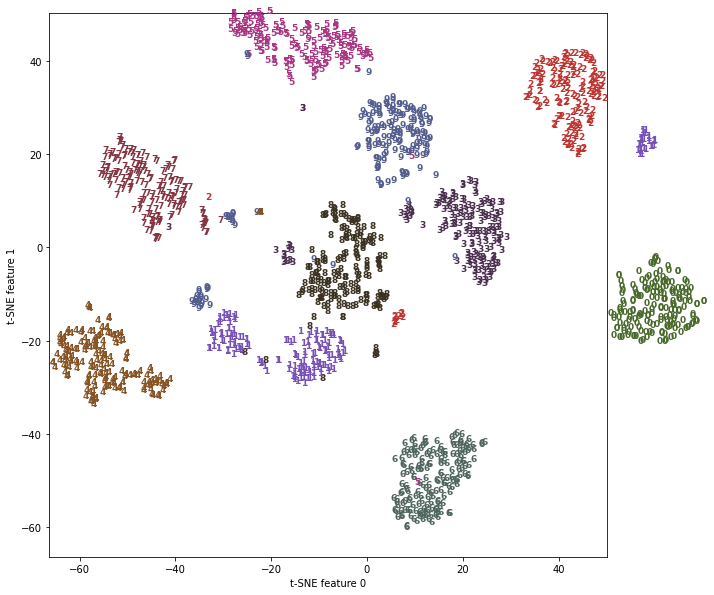

In [161]:
from sklearn.manifold import TSNE

tsne = TSNE(random_state=42)
digits_tsne = tsne.fit_transform(digits.data)

plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 1].max())
plt.ylim(digits_tsne[:, 0].min(), digits_tsne[:, 1].max())
plt.xlabel('t-SNE feature 0')
plt.ylabel('t-SNE feature 1')

for i in range(len(digits.data)):
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),
             color=colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})

클래스 대부분이 확실하게 구분된 모습을 확인할 수 있습니다. 물론 1과 9는 약간 나뉜 모습을 보입니다.

t-SNE 알고리즘은 클래스 레이블 정보를 전혀 사용하지 않으므로 완전한 비지도 학습입니다. 그럼에도 원본 데이터 공간에서 포인트들이 얼마나 가까이 있는지에 대한 정보로 클래스가 잘 구분되는 2차원 표현을 찾아냅니다.

t-SNE는 매개변수를 약간 조정해야 하지만 대개 기본값으로도 잘 작동합니다. `perplexity`와 `early_exaggeration`을 조정해볼 수 있지만 효과는 크지 않습니다.

# 3.5 군집

'군집(clustering)'은 데이터셋을 클러스터(cluster)라는 그룹으로 나누는 작업을 의미합니다. 한 클러스터 안의 샘플끼리는 매우 비슷하고, 다른 클러스터 안의 샘플과는 구분되도록 데이터를 나누는 것이 클러스터링의 목표입니다. 군집 알고리즘은 각 샘플이 어느 클러스터에 속하는지 할당하거나 예측합니다. 분류 알고리즘과 비슷합니다.

## 3.5.1 k-평균 군집

'k-평균(k-means) 군집'은 가장 간단하고 널리 사용되는 군집 알고리즘입니다.   
알고리즘이 작동하는 방식을 간략하게 설명하겠습니다. 먼저 데이터의 어떤 영역을 대표하는 '클러스터 중심(cluster center, centroids)'을 찾습니다(앞으로는 센트로이드로 부릅니다). 그리고 샘플을 가장 가까운 센트로이드에 할당하고, 클러스터에 할당된 샘플의 평균으로 센트로이드를 다시 지정합니다. 클러스터에 할당되는 샘플에 변화가 없으면 알고리즘을 종료합니다.

예시용 데이터셋에 k-평균 군집을 적용합니다.

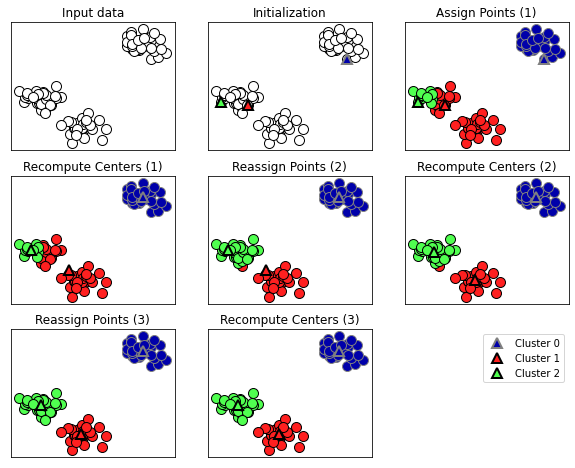

In [163]:
mglearn.plots.plot_kmeans_algorithm()

삼각형은 센트로이드를 가리킵니다. 원은 샘플입니다. 클러스터는 세 가지 색으로 구분했습니다.
 
클러스터 3개를 찾아야 하므로 알고리즘이 센트로이드로 삼을 샘플 3개를 무작위로 초기화(initialization)했습니다.

초기화를 마친 뒤에는 먼저 각 샘플을 가장 가까운 센트로이드에 할당(assign points)합니다. 그 다음에 할당한 샘플의 평균값으로 센트로이드를 갱신(recompute centers)합니다. 이 방식으로 총 세 번을 반복합니다. 반복을 마치면 센트로이드에 할당될 샘플에 변화가 없으므로 알고리즘을 종료합니다.

새로운 샘플이 주어지면 k-평균 알고리즘은 가장 가까운 센트로이드를 할당합니다.

참고로 `Kmeans` 클래스는 `init` 매개변수로 클러스터 초기화 방식을 지정합니다. 기본값은 `k-means++`입니다. 초기 클러스터 중심을 최대한 멀리 떨어지도록 만드는 알고리즘을 지정하는 값입니다. `random`으로 지정하면 다른 값은 초기 센트로이드를 무작위로 선택하게 합니다. 위 그림은 초기 클러스터를 무작위로 할당한 예입니다. `init` 매개변수에 수동으로 초기 센트로이드를 지정했습니다.

바로 위 그림에서 나타낸 센트로이드와 클러스터의 경계를 출력합니다.

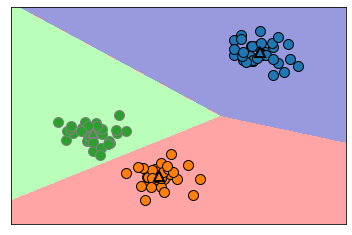

In [164]:
mglearn.plots.plot_kmeans_boundaries()

앞에서 사용한 인위적 데이터셋에 적용합니다. 그런 다음 

In [165]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, y = make_blobs(random_state=1)
# `n_clusters` 매개변수에 클러스터 수를 지정합니다.
# 기본값은 8이며, 보통 그대로 사용하지 않고 따로 지정합니다.
kmeans = KMeans(n_clusters=3)

kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

알고리즘을 적용하면 X에 담긴 각 훈련 샘플에 클러스터 레이블이 할당됩니다. `KMeans` 클래스의 클러스터 레이블 할당은 무작위입니다. 따라서 이미지의 클러스터 레이블은 언제든 바뀔 수 있습니다.

`kmeans.labels_` 속성에서 무작위로 할당된 레이블을 확인할 수 있습니다.

In [168]:
print('클러스터 레이블:\n{}'.format(kmeans.labels_))

클러스터 레이블:
[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


클러스터 3개를 지정했으므로 각 클러스터는 0~2까지의 번호 중에 하나를 가집니다.

`predict` 메서드를 사용해서 새로운 데이터의 클러스터 레이블을 예측할 수 있습니다. 예측은 각 샘플에 가장 가까운 센트로이드를 할당하는 것이며, 기존 모델을 변경하지 않고 그대로 유지합니다.

훈련 세트에 대해 `predict` 메서드를 실행하면 `labels_`와 동일한 결과를 얻습니다.

In [169]:
print(kmeans.predict(X))

[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


군집은 각 샘플이 레이블을 가진다는 면에서 분류와 유사한 면이 있습니다. 다만 정답을 모르고, 레이블 자체에 특별한 의미는 없습니다. 앞서 제시한 얼굴 이미지를 군집화하는 예를 생각한다면, 알고리즘이 찾은 클러스터 3에는 한 사람의 얼굴만 담겨 있을 수 있습니다. 그러나 사진을 직접 보지 않고는 알 수 없습니다. 그저 알고리즘이 우리에게 주는 정보는 3으로 레이블 된 얼굴들은 서로 비슷하다는 것뿐입니다. 숫자 3은 아무런 의미도 갖지 않습니다. 한 그룹은 레이블 0으로, 다른 그룹은 레이블 1로 지정되는 것은 아무 의미가 없다는 것입니다. 초기화가 무작위로 이뤄지기 때문에 알고리즘을 재시작하면 클러스터 번호가 다르게 부여될 수 있습니다.

이 데이터로 그래프를 다시 그립니다. `cluster_centers_` 속성에 저장된 센트로이드를 삼각형으로 표시합니다.

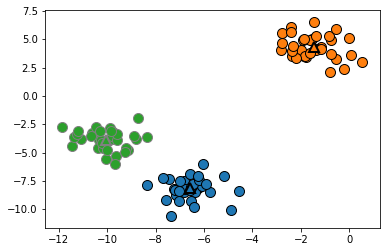

In [171]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:, 0], 
                         kmeans.cluster_centers_[:, 1], 
                         [0, 1, 2], markers='^', markeredgewidth=2)
plt.show()

클러스터 수를 늘리고 줄입니다.

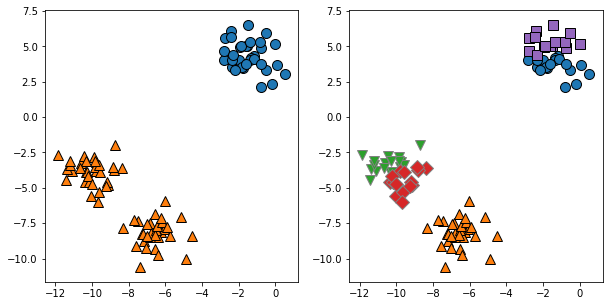

In [181]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[0])

kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1])
plt.show()

### k-평균 알고리즘이 실패하는 경우

### 벡터 양자화 또는 분해 메서드로서의 k-평균

## 3.5.2 병합 군집

### 계층적 군집과 덴드로그램

## 3.5.3 DBSCAN

## 3.5.4 군집 알고리즘의 비교와 평가

### 타깃값으로 군집 평가하기

### 타깃값 없이 군집 평가하기

### 얼굴 데이터셋으로 군집 알고리즘 비교

#### DBSCAN으로 얼굴 데이터셋 분석하기

#### k-평균으로 얼굴 데이터셋 분석하기

#### 병합 군집으로 얼굴 데이터셋 분석하기

## 3.5.5 군집 알고리즘 요약

# 3.6 요약 및 정리